In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential,Model
import numpy as np
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Potato/Train'
valid_path = '/content/drive/MyDrive/Potato/Test'

In [4]:
#importing the vgg 19 and by default i'm using the imagenet weights 

vgg = VGG19(input_shape=IMAGE_SIZE+[3],include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [5]:
#don't train existing model
for layer in vgg.layers:
  layer.trainable=False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Potato/Train/*')

In [7]:
folders

['/content/drive/MyDrive/Potato/Train/Potato___healthy',
 '/content/drive/MyDrive/Potato/Train/Potato___Late_blight',
 '/content/drive/MyDrive/Potato/Train/Potato___Early_blight']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile (loss = 'categorical_crossentropy',optimizer = 'adam',metrics = 'accuracy')

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Potato/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 896 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Potato/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 3 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/2
28/28 [==============================] - 14s 505ms/step - loss: 0.1273 - accuracy: 0.9643 - val_loss: 0.1500 - val_accuracy: 0.9500
Epoch 2/2
28/28 [==============================] - 15s 518ms/step - loss: 0.1132 - accuracy: 0.9699 - val_loss: 0.2100 - val_accuracy: 0.9367


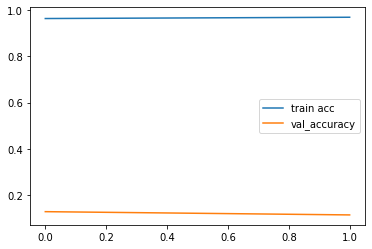

In [17]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['loss'], label='val_accuracy')
plt.legend()
plt.show()

In [18]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model.h5')

# **Model Prediction**

In [19]:
def load_image(img_path, show = False) :
    img = image.load_img(img_path, target_size = (224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis = 0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]


    if show :
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
    return img_tensor


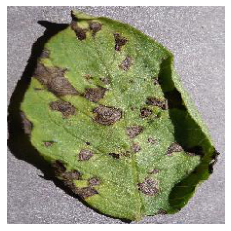

Predicted Class :  Potato___Early_blight
Actual Class :  Potato___Early_blight
Confidence :  99.96 %
_____________________________________________________________


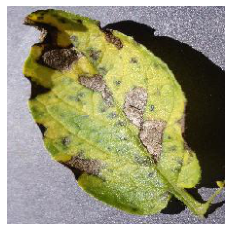

Predicted Class :  Potato___Early_blight
Actual Class :  Potato___Early_blight
Confidence :  86.12 %
_____________________________________________________________


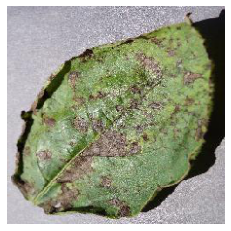

Predicted Class :  Potato___Early_blight
Actual Class :  Potato___Early_blight
Confidence :  99.9 %
_____________________________________________________________


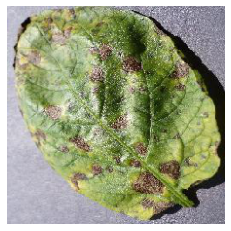

Predicted Class :  Potato___Early_blight
Actual Class :  Potato___Early_blight
Confidence :  94.16 %
_____________________________________________________________


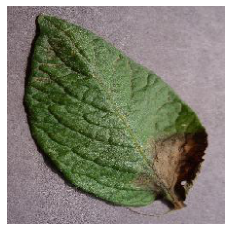

Predicted Class :  Potato___Late_blight
Actual Class :  Potato___Late_blight
Confidence :  98.52 %
_____________________________________________________________


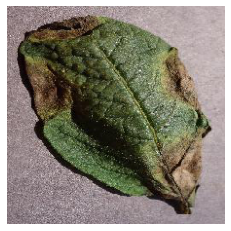

Predicted Class :  Potato___Late_blight
Actual Class :  Potato___Late_blight
Confidence :  99.5 %
_____________________________________________________________


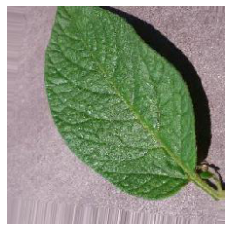

Predicted Class :  Potato___healthy
Actual Class :  Potato___healthy
Confidence :  72.61 %
_____________________________________________________________


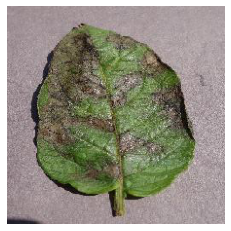

Predicted Class :  Potato___Late_blight
Actual Class :  Potato___Late_blight
Confidence :  99.75 %
_____________________________________________________________


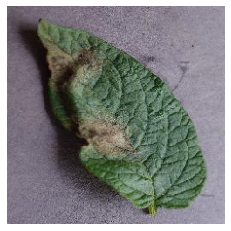

Predicted Class :  Potato___Late_blight
Actual Class :  Potato___Late_blight
Confidence :  99.51 %
_____________________________________________________________


In [22]:
def get_labels(test_path) : 
    # getting class labels
    from glob import glob

    class_names = []
    test_path = test_path + '/*'
    for i in glob(test_path) :  # Reads all the folders in which images are present
        class_names.append(i.split('/')[-1])

    # return dict(zip(class_names, range(len(class_names))))    # return dictionary containing class name and numeric label.
    return sorted(class_names)


if __name__ == "__main__":
    
    # load model
    model = load_model("/content/drive/MyDrive/Potato/model.h5", compile = False)

    # image path
    img1 = '/content/drive/MyDrive/Potato/Valid/Potato___Early_blight/72013507-bfce-4b7a-b56e-f66a94cb4558___RS_Early.B 7930.JPG'   
    img2 = '/content/drive/MyDrive/Potato/Valid/Potato___Early_blight/73273541-2855-4516-92c3-658703bd2d18___RS_Early.B 6814.JPG'
    img3 = '/content/drive/MyDrive/Potato/Valid/Potato___Early_blight/a1dd3cdf-0ff5-49f6-b66e-9b3632a07019___RS_Early.B 7833.JPG'
    img4 = '/content/drive/MyDrive/Potato/Valid/Potato___Early_blight/a4ac4e39-1342-4b1d-806a-98789876a701___RS_Early.B 8953.JPG'
    img5 = '/content/drive/MyDrive/Potato/Valid/Potato___Late_blight/99064106-3789-4de4-b109-ebc83a20d94b___RS_LB 2757.JPG'
    img6 = '/content/drive/MyDrive/Potato/Valid/Potato___Late_blight/a5a6ebeb-2535-441d-acf5-33bce305fa14___RS_LB 3304.JPG'
    img7 = '/content/drive/MyDrive/Potato/Valid/Potato___healthy/Potato_healthy-55-_0_5377.jpg'
    img8 = '/content/drive/MyDrive/Potato/Valid/Potato___Late_blight/b69f17e7-b4e1-4911-91e4-01976bacba2d___RS_LB 5053.JPG'
    img9 = '/content/drive/MyDrive/Potato/Valid/Potato___Late_blight/b9cde1e2-71f8-46a2-9fa4-0bfc7d16815f___RS_LB 2610.JPG'


    class_names = get_labels('/content/drive/MyDrive/Potato/Valid')
    for i in [img1, img2, img3, img4, img5, img6, img7, img8, img9] : 
        new_image = load_image(i, show = True)
        y_proba = model.predict(new_image)
        confidence = round(100 * (np.max(y_proba[0])), 2)
        print('Predicted Class : ', class_names[np.argmax(y_proba)])
        print('Actual Class : ', i.split('/')[-2])
        print('Confidence : ', confidence, '%')
        print('_____________________________________________________________')